In [2]:
import pandas as pd
import numpy as np
import csv 
import matplotlib.pyplot as plt
import seaborn as sns


#https://altair-viz.github.io/gallery/errorbars_with_std.html
#import altair as alt
#from vega_datasets import data

#defining paths
allAlgorithms_unigram_900terms = './boxplotbaseH1H2H3-meta.csv'
#classifierChain = './experiment/dfTesteClassifierChain_13Labels.csv'


dataBinary = pd.read_csv(allAlgorithms_unigram_900terms)
#dataClassifier = pd.read_csv(classifierChain)

In [3]:
dataBinary

,date_time,tf-IDF,#_TopTerms,Stop_Word,Train/Test_Size,Algorithm,Accuracy_Score,Accuracy_Score_not_normalized,zero_one_loss,AUC-PR,hamming_loss_avg,Jaccard_samples,Jaccard_macro,Precision,Recall,Fmeasure_Score,i
0,36:43.9,"(1, 1)",895,Yes,0.2,Baseline,0.189944,34,0.810056,0.792486,0.152235,0.589612,0.586599,0.726135,0.753247,0.739442,0
1,36:45.6,"(1, 1)",895,Yes,0.2,Baseline,0.145251,26,0.854749,0.723056,0.168529,0.533606,0.515395,0.706422,0.655877,0.680212,1
2,36:47.2,"(1, 1)",895,Yes,0.2,Baseline,0.162011,29,0.837989,0.758259,0.151769,0.552636,0.563003,0.717949,0.722892,0.720412,2
3,36:48.8,"(1, 1)",895,Yes,0.2,Baseline,0.145251,26,0.854749,0.755348,0.160149,0.536526,0.549148,0.697171,0.721170,0.708968,3
4,36:50.5,"(1, 1)",895,Yes,0.2,Baseline,0.167598,30,0.832402,0.727768,0.174115,0.531145,0.514916,0.689236,0.670608,0.679795,4
5,36:52.1,"(1, 1)",895,Yes,0.2,Baseline,0.145251,26,0.854749,0.744146,0.167132,0.538782,0.542092,0.710702,0.695581,0.703060,5
6,36:53.6,"(1, 1)",895,Yes,0.2,Baseline,0.122905,22,0.877095,0.795847,0.151304,0.551461,0.575718,0.743676,0.718241,0.730737,6
7,36:55.1,"(1, 1)",895,Yes,0.2,Baseline,0.117318,21,0.882682,0.773198,0.169460,0.531289,0.539823,0.721284,0.682109,0.701149,7
8,36:56.7,"(1, 1)",895,Yes,0.2,Baseline,0.128492,23,0.871508,0.765218,0.161546,0.546539,0.548765,0.723842,0.694079,0.708648,8
9,36:58.4,"(1, 1)",895,Yes,0.2,Baseline,0.134078,24,0.865922,0.802819,0.161546,0.558821,0.560759,0.735880,0.702060,0.718573,9


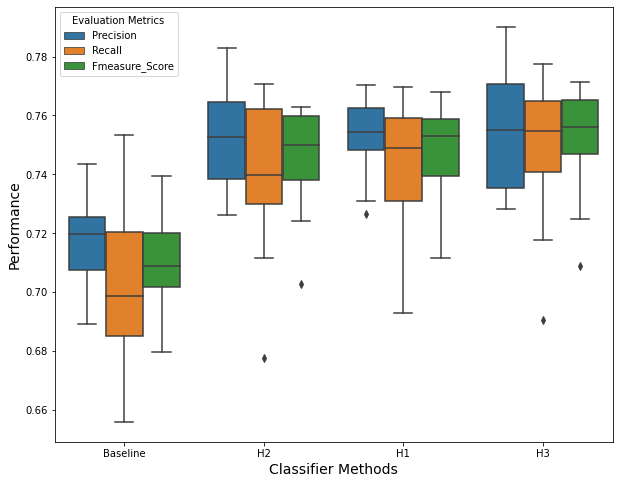

In [4]:
dd=pd.melt(dataBinary,id_vars=['Algorithm'],value_vars=['Precision','Recall','Fmeasure_Score'],var_name='Evaluation Metrics')

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='value',x='Algorithm',data=dd,hue='Evaluation Metrics')
plt.ylabel("Performance", size=14)
plt.xlabel("Classifier Methods",size=14)

labels=["Precision", "Recall", "F-measure"]
#h, l = ax.get_legend_handles_labels()
#ax.legend(h, labels, title="Evaluation Metrics",bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
#plt.title("Evaluation Metrics by Hypothesis", size=12)
plt.savefig("H1H2H3Baseline-comparison.pdf")
plt.show()



In [5]:
dataBinary.groupby(['tf-IDF','#_TopTerms','Algorithm']).mean()

Train/Test_Size  Accuracy_Score  \
tf-IDF #_TopTerms Algorithm                                    
(1, 1) 895        Baseline               0.2        0.145810   
                  H1                     0.2        0.221229   
                  H2                     0.2        0.201117   
                  H3                     0.2        0.226816   

                             Accuracy_Score_not_normalized  zero_one_loss  \
tf-IDF #_TopTerms Algorithm                                                 
(1, 1) 895        Baseline                            26.1       0.854190   
                  H1                                  39.6       0.778771   
                  H2                                  36.0       0.798883   
                  H3                                  40.6       0.773184   

                               AUC-PR  hamming_loss_avg  Jaccard_samples  \
tf-IDF #_TopTerms Algorithm                                                
(1, 1) 895        Baseline   0.763814          0.161778         0.547042   
                  H1         0.795030          0.143482         0.576967   
                  H2         0.799396          0.145065         0.575407   
                  H3         0.799214          0.142505         0.583165   

                             Jaccard_macro  Precision    Recall  \
tf-IDF #_TopTerms Algorithm                                       
(1, 1) 895        Baseline        0.549622   0.717230  0.701586   
                  H1              0.596548   0.752291  0.742291   
                  H2              0.593662   0.751759  0.738426   
                  H3              0.602183   0.755334  0.747922   

                             Fmeasure_Score    i  
tf-IDF #_TopTerms Algorithm                       
(1, 1) 895        Baseline         0.709100  4.5  
                  H1               0.747079  4.5  
                  H2               0.744768  4.5  
                  H3               0.751412  4.5

In [6]:
dataBinary.nlargest(5,['Precision','Fmeasure_Score'])

,date_time,tf-IDF,#_TopTerms,Stop_Word,Train/Test_Size,Algorithm,Accuracy_Score,Accuracy_Score_not_normalized,zero_one_loss,AUC-PR,hamming_loss_avg,Jaccard_samples,Jaccard_macro,Precision,Recall,Fmeasure_Score,i
36,30:42.6,"(1, 1)",895,Yes,0.2,H3,0.217877,39,0.782123,0.813602,0.133613,0.593416,0.626788,0.790164,0.751950,0.770584,6
16,17:39.2,"(1, 1)",895,Yes,0.2,H2,0.201117,36,0.798883,0.819205,0.135009,0.585269,0.614362,0.783051,0.740385,0.761120,6
30,30:27.8,"(1, 1)",895,Yes,0.2,H3,0.240223,43,0.759777,0.801130,0.138734,0.602363,0.621347,0.777424,0.755796,0.766458,0
37,30:45.2,"(1, 1)",895,Yes,0.2,H3,0.256983,46,0.743017,0.823709,0.135009,0.607413,0.627728,0.772512,0.770079,0.771293,7
26,45:59.4,"(1, 1)",895,Yes,0.2,H1,0.217877,39,0.782123,0.803349,0.136872,0.587583,0.613158,0.770248,0.750403,0.760196,6


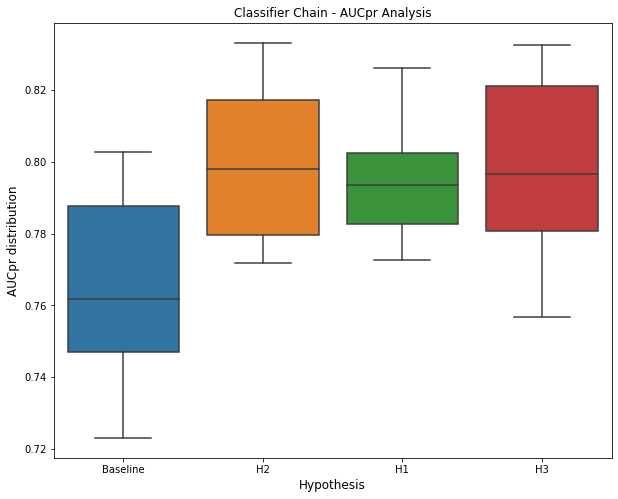

In [7]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='AUC-PR',x='Algorithm',data=dataBinary)
plt.ylabel("AUCpr distribution", size=12)
plt.xlabel("Hypothesis",size=12)
plt.title("Classifier Chain - AUCpr Analysis", size=12)
plt.show()


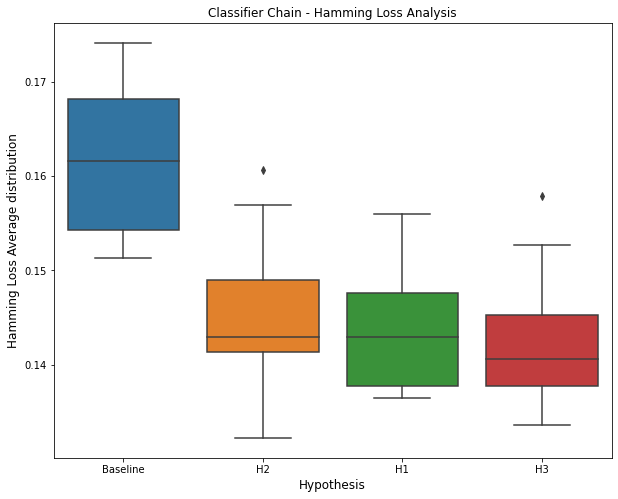

In [8]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='hamming_loss_avg',x='Algorithm',data=dataBinary)
plt.ylabel("Hamming Loss Average distribution", size=12)
plt.xlabel("Hypothesis",size=12)
plt.title("Classifier Chain - Hamming Loss Analysis", size=12)
plt.show()

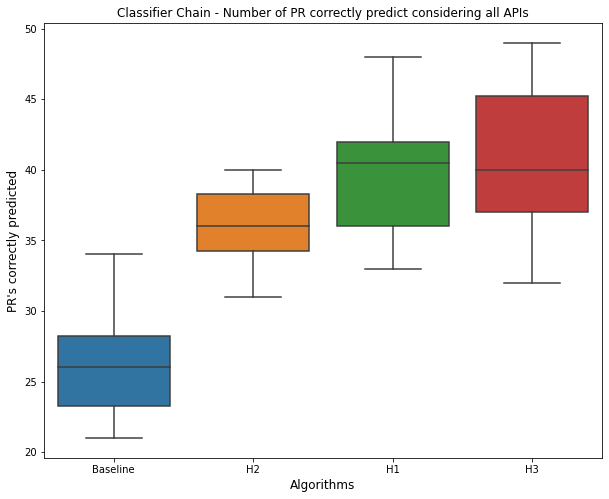

In [9]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='Accuracy_Score_not_normalized',x='Algorithm',data=dataBinary)
plt.ylabel("PR's correctly predicted", size=12)
plt.xlabel("Algorithms",size=12)
plt.title("Classifier Chain - Number of PR correctly predict considering all APIs", size=12)
plt.show()

In [10]:
def cliffsDelta(lst1, lst2, **dull):

    """Returns delta and true if there are more than 'dull' differences"""
    if not dull:
        dull = {'small': 0.147, 'medium': 0.33, 'large': 0.474} # effect sizes from (Hess and Kromrey, 2004)
    m, n = len(lst1), len(lst2)
    lst2 = sorted(lst2)
    j = more = less = 0
    for repeats, x in runs(sorted(lst1)):
        while j <= (n - 1) and lst2[j] < x:
            j += 1
        more += j*repeats
        while j <= (n - 1) and lst2[j] == x:
            j += 1
        less += (n - j)*repeats
    d = (more - less) / (m*n)
    size = lookup_size(d, dull)
    return d, size


def lookup_size(delta: float, dull: dict) -> str:
    """
    :type delta: float
    :type dull: dict, a dictionary of small, medium, large thresholds.
    """
    delta = abs(delta)
    if delta < dull['small']:
        return 'negligible'
    if dull['small'] <= delta < dull['medium']:
        return 'small'
    if dull['medium'] <= delta < dull['large']:
        return 'medium'
    if delta >= dull['large']:
        return 'large'


def runs(lst):
    """Iterator, chunks repeated values"""
    for j, two in enumerate(lst):
        if j == 0:
            one, i = two, 0
        if one != two:
            yield j - i, one
            i = j
        one = two
    yield j - i + 1, two

In [11]:
#https://machinelearningmastery.com/effect-size-measures-in-python/
#Small Effect Size: d=0.20
#Medium Effect Size: d=0.50
#Large Effect Size: d=0.80

from numpy import mean
from numpy import var
from math import sqrt

def cohend(d1, d2):
	# calculate the size of samples
	n1, n2 = len(d1), len(d2)
	# calculate the variance of the samples
	s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
	# calculate the pooled standard deviation
	s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	# calculate the means of the samples
	u1, u2 = mean(d1), mean(d2)
	# calculate the effect size
	return (u1 - u2) / s


In [33]:
#Subsetting data to compute Stats

Baseline_binary = dataBinary[dataBinary.Algorithm == 'Baseline']
Baseline_FMeasure = Baseline_binary['Fmeasure_Score']

H1_binary = dataBinary[dataBinary.Algorithm == 'H1']
H1_FMeasure = H1_binary['Fmeasure_Score']

H2_binary = dataBinary[dataBinary.Algorithm == 'H2']
H2_FMeasure = H2_binary['Fmeasure_Score']

H3_binary = dataBinary[dataBinary.Algorithm == 'H3']
H3_FMeasure = H3_binary['Fmeasure_Score']




In [34]:
##Kruskall Wallis - Group Comparison

#Fail to Reject H0: Paired sample distributions are equal.
#Reject H0: Paired sample distributions are not equal.
    
from scipy.stats import kruskal
# seed the random number generator


# compare samples
stat, p = kruskal(Baseline_FMeasure,H1_FMeasure, H2_FMeasure,H3_FMeasure)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=16.674, p=0.001
Different distributions (reject H0)


In [35]:
#https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
from scipy.stats import friedmanchisquare

# compare samples
stat, p = friedmanchisquare(Baseline_FMeasure,H1_FMeasure,H2_FMeasure,H3_FMeasure)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')


Statistics=21.000, p=0.000
Different distributions (reject H0)


In [57]:
#### MANN-U Independent Samples
from scipy.stats import mannwhitneyu

#Fail to Reject H0: Sample distributions are equal.
#Reject H0: Sample distributions are not equal.

##### Defining variables to be comparede

# compare samples
stat, p = mannwhitneyu(H2_FMeasure, H1_FMeasure)
print('Statistics=%.3f, p=%.5f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')
# compare samples
stat, p = mannwhitneyu(H2_FMeasure, H3_FMeasure)
print('Statistics=%.3f, p=%.5f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')
# compare samples
stat, p = mannwhitneyu(H1_FMeasure, H3_FMeasure)
print('Statistics=%.3f, p=%.5f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

   
#Effect_Size Baseline Vs others   
print(cliffsDelta(Baseline_FMeasure, H1_FMeasure))
print(cliffsDelta(Baseline_FMeasure, H2_FMeasure))
print(cliffsDelta(Baseline_FMeasure, H3_FMeasure))

#Effect_Size H1 Vs others
print(cliffsDelta(H1_FMeasure, H2_FMeasure))
print(cliffsDelta(H1_FMeasure, H3_FMeasure))

#Effect_Size H2 Vs others
print(cliffsDelta(H2_FMeasure, H3_FMeasure))



Statistics=48.000, p=0.45486
Same distribution (fail to reject H0)
Statistics=35.000, p=0.13652
Same distribution (fail to reject H0)
Statistics=38.000, p=0.19234
Same distribution (fail to reject H0)
(-0.86, 'large')
(-0.8, 'large')
(-0.88, 'large')
(0.04, 'negligible')
(-0.24, 'small')
(-0.3, 'small')


In [37]:
#Effect_Size RandomForest Vs others   
print('Cohens d: %.3f' % cohend(RF_FMeasure, LogisticRegression_FMeasure))    
print('Cohens d: %.3f' % cohend(RF_FMeasure, MLPC_FMeasure))
print('Cohens d: %.3f' % cohend(RF_FMeasure, DT_FMeasure))
print('Cohens d: %.3f' % cohend(RF_FMeasure, MlkNN_FMeasure))

#Effect_Size LogisticRegression Vs others
print('Cohens d: %.3f' % cohend(LogisticRegression_FMeasure, MLPC_FMeasure))    
print('Cohens d: %.3f' % cohend(LogisticRegression_FMeasure, DT_FMeasure))    
print('Cohens d: %.3f' % cohend(LogisticRegression_FMeasure, MlkNN_FMeasure))    

#Effect_Size MLPC Vs others
print('Cohens d: %.3f' % cohend(MLPC_FMeasure, DT_FMeasure))    
print('Cohens d: %.3f' % cohend(MLPC_FMeasure, MlkNN_FMeasure))    

#Effect_Size MlkNN Vs others
print('Cohens d: %.3f' % cohend(MlkNN_FMeasure,DT_FMeasure))    

NameError: name 'RF_FMeasure' is not defined

In [38]:
### Wilcoxon paired and dependent samples

#Fail to Reject H0: Sample distributions are equal.
#Reject H0: Sample distributions are not equal.

#from scipy.stats import wilcoxon

#stat, p = wilcoxon(data1, data2)
#print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
#alpha = 0.05
#if p > alpha:
#	print('Same distribution (fail to reject H0)')
#else:
#	print('Different distribution (reject H0)')

In [48]:
###Precision analysis
#Subsetting data to compute Stats

Baseline_binary = dataBinary[dataBinary.Algorithm == 'Baseline']
Baseline_Precision = Baseline_binary['Precision']

H1_binary = dataBinary[dataBinary.Algorithm == 'H1']
H1_Precision = H1_binary['Precision']

H2_binary = dataBinary[dataBinary.Algorithm == 'H2']
H2_Precision = H2_binary['Precision']

H3_binary = dataBinary[dataBinary.Algorithm == 'H3']
H3_Precision = H3_binary['Precision']

In [58]:
#### MANN-U Independent Samples
from scipy.stats import mannwhitneyu

#Fail to Reject H0: Sample distributions are equal.
#Reject H0: Sample distributions are not equal.

##### Defining variables to be comparede

# compare samples
stat, p = mannwhitneyu(H2_Precision, H1_Precision)
print('Statistics=%.3f, p=%.5f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')
# compare samples
stat, p = mannwhitneyu(H2_Precision, H3_Precision)
print('Statistics=%.3f, p=%.5f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')
# compare samples
stat, p = mannwhitneyu(H1_Precision, H3_Precision)
print('Statistics=%.3f, p=%.5f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

   
#Effect_Size RandomForest Vs others   
print(cliffsDelta(Baseline_Precision, H1_Precision))
print(cliffsDelta(Baseline_Precision,H2_Precision))
print(cliffsDelta(Baseline_Precision, H3_Precision))

#Effect_Size H1 Vs others
print(cliffsDelta(H1_Precision,H2_Precision))
print(cliffsDelta(H1_Precision, H3_Precision))

#Effect_SizeH2 Vs others
print(cliffsDelta(H2_Precision, H3_Precision))



Statistics=48.000, p=0.45486
Same distribution (fail to reject H0)
Statistics=46.000, p=0.39567
Same distribution (fail to reject H0)
Statistics=44.000, p=0.33879
Same distribution (fail to reject H0)
(-0.92, 'large')
(-0.88, 'large')
(-0.88, 'large')
(0.04, 'negligible')
(-0.12, 'negligible')
(-0.08, 'negligible')


In [19]:
##Kruskall Wallis - Group Comparison

#Fail to Reject H0: Paired sample distributions are equal.
#Reject H0: Paired sample distributions are not equal.
    
from scipy.stats import kruskal
# seed the random number generator


# compare samples
stat, p = kruskal(RF_Precision,LogisticRegression_Precision, MLPC_Precision,DT_Precision,MlkNN_Precision)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=nan, p=nan
Different distributions (reject H0)


In [20]:
#https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
from scipy.stats import friedmanchisquare

# compare samples
stat, p = friedmanchisquare(RF_Precision,LogisticRegression_Precision, MLPC_Precision,DT_Precision,MlkNN_Precision)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

ZeroDivisionError: division by zero